In [1]:
import numpy as np

In [2]:
import pandas as pd
#Configuración de parametros de Pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 3)
pd.set_option('plotting.backend', 'matplotlib') 
pd.options.mode.chained_assignment = None

# En produccion eliminar, se incluye por informacion
print(f'Pandas Version: {pd.__version__}') 

Pandas Version: 2.0.0


In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
X_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_train_con_escalado.csv', encoding = 'unicode_escape')
X_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/X_test_con_escalado.csv', encoding = 'unicode_escape')

y_train = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_train.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)
y_test = pd.read_csv('/home/pedro/TpIAFiuba/Datos/y_test.csv', encoding = 'unicode_escape').to_numpy().reshape(-1)

Los hiperparametros de los modelos los sacamos de los anteriores entrenamientos (Entrenamientos sin reducción)

In [6]:
from lightgbm import LGBMClassifier

In [7]:
lgbm_clf = LGBMClassifier(random_state=10, n_estimators=120)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf_clf = RandomForestClassifier(random_state=10, min_samples_leaf=2)

In [11]:
import xgboost as xgb

In [12]:
xgb_clf = xgb.XGBClassifier(random_state=10, alpha=7)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [15]:
estimators = [("LGBM", lgbm_clf), ("RF", rf_clf), ("XGB", xgb_clf)]

In [16]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [17]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(n_estimators=120,
                                               random_state=10)),
                               ('RF',
                                RandomForestClassifier(min_samples_leaf=2,
                                                       random_state=10)),
                               ('XGB',
                                XGBClassifier(alpha=7, base_score=None,
                                              booster=None, callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eva...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, ...))],
                   final_estimator=LogisticRegression())

In [18]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [19]:
preds = clf.predict(X_test)

In [20]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      8211
           1       0.75      0.78      0.77      8211

    accuracy                           0.76     16422
   macro avg       0.76      0.76      0.76     16422
weighted avg       0.76      0.76      0.76     16422



In [21]:
recall_score(y_test, preds)

0.784191937644623

In [22]:
accuracy_score(y_test, preds)

0.762757276823773

In [23]:
cm = confusion_matrix(y_test, preds)

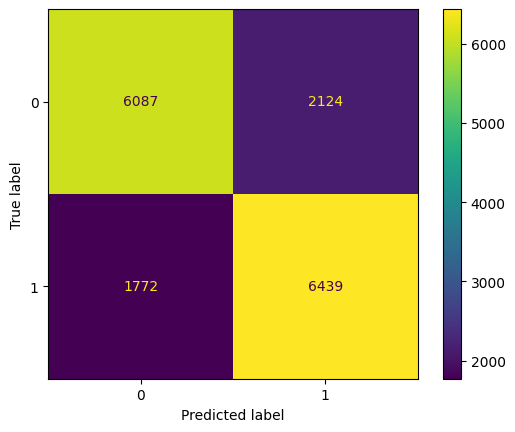

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()